<class 'numpy.ndarray'>


Text(-1, 5, '(-1, 5), test point')

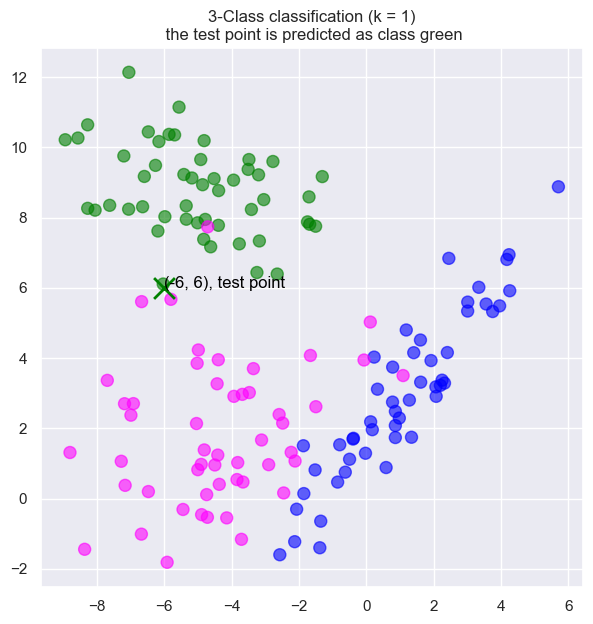

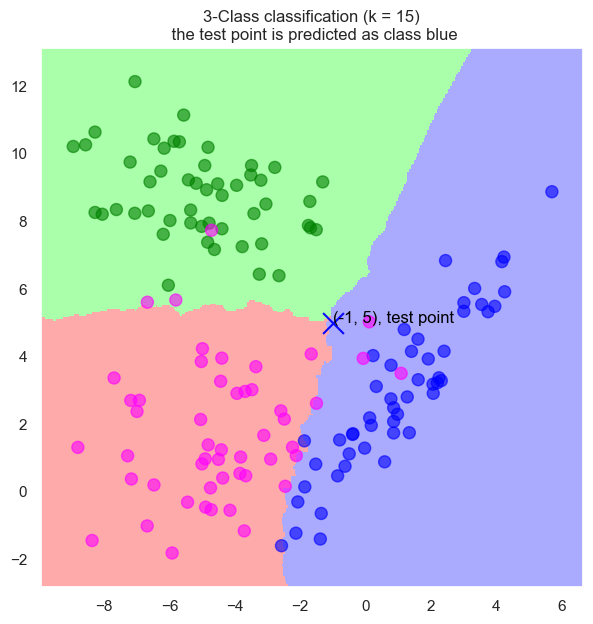

In [2]:
"""
Created on Fri Apr 17 11:18:40 2020

@author: shang
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import neighbors

sns.set()


dataset=pd.read_csv('task6_1_dataset.csv')
x1=dataset['x1']
x2=dataset['x2']
X_train = np.c_[x1, x2]

Y_train = dataset['y'].values 
print(type(Y_train)) 

k = 1
knn = neighbors.KNeighborsClassifier(k)
knn.fit(X_train, Y_train)

cmap_bold = ListedColormap(['green', 'blue', 'magenta'])

fig,ax = plt.subplots(figsize=(7, 7), dpi=100)

scale = 75
alpha = 0.6
colors = ['green', 'blue', 'magenta']

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

X_test = [[-6,6]]
Y_pred = knn.predict(X_test)

ax.scatter(X_test[0][0], X_test[0][1], marker="x", s=3*scale, lw=2, c=colors[Y_pred.astype(int)[0]])


ax.set_title("3-Class classification (k = {})\n the test point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]))
ax.text(X_test[0][0], X_test[0][1], '(%d, %d), %s' % (X_test[0][0], X_test[0][1],'test point') , color='black')


k = 15
knn = neighbors.KNeighborsClassifier(k)
knn.fit(X_train, Y_train)

h = 0.05

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF', '#FFAAAA'])

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])


Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7), dpi=100)
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

 
X_test = [[-1, 5]]
Y_pred = knn.predict(X_test)
ax.scatter(X_test[0][0], X_test[0][1], alpha=0.95, color=colors[Y_pred.astype(int)[0]], marker='x', s=3*scale)

ax.set_title("3-Class classification (k = {})\n the test point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]))

ax.text(X_test[0][0], X_test[0][1], '(%d, %d), %s' % (X_test[0][0], X_test[0][1],'test point'), color='black' )


